In [55]:
import numpy as np 
import pandas as pd 

In [89]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

###Load Dataset

In [ ]:
df = pd.read_csv ('/kaggle/input/grading-of-the-students-in-the-exam-or/Grading of the students in the exam (OR).csv')
df.head(2)


In [56]:
df = pd.read_csv('Credit.csv')
df.head(2)

,age,job,marital,education,balance,housing,duration,campaign,approval
0,30.0,unemployed,married,primary,1787,no,79.0,1,no
1,33.0,services,married,secondary,4789,yes,220.0,1,no


In [57]:
df.shape

(4521, 9)

In [58]:
df.describe()

,age,balance,duration,campaign
count,4519.000000,4521.000000,4.519000e+03,4521.000000
mean,41.381279,1422.657819,5.983921e+03,2.793630
std,13.966475,3009.638142,3.570683e+05,3.109807
min,-38.000000,-3313.000000,-7.990000e+02,1.000000
25%,33.000000,69.000000,1.040000e+02,1.000000
50%,39.000000,444.000000,1.850000e+02,2.000000
75%,49.000000,1480.000000,3.295000e+02,3.000000
max,416.000000,71188.000000,2.395650e+07,50.000000


In [59]:
df.describe(include='object')

,job,marital,education,housing,approval
count,4515,4518,4517,4518,4521
unique,12,3,4,2,2
top,management,married,secondary,yes,no
freq,965,2796,2305,2556,4000


In [60]:
df['approval'].value_counts()

no     4000
yes     521
Name: approval, dtype: int64

<Axes: >

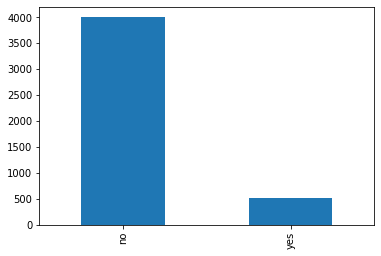

In [61]:
df['approval'].value_counts().plot.bar()

In [62]:
df.isnull().sum()

age          2
job          6
marital      3
education    4
balance      0
housing      3
duration     2
campaign     0
approval     0
dtype: int64

In [63]:
df=df.dropna()
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
duration     0
campaign     0
approval     0
dtype: int64

In [64]:
## Encoding + CV 
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df.drop(['approval'], axis =1))
y = df[['approval']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train.head()

,age,balance,duration,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes
4308,44.0,5597,27.0,3,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3052,40.0,4610,154.0,2,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
610,50.0,72,141.0,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2202,29.0,199,1689.0,4,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1169,37.0,1193,396.0,2,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


<Axes: xlabel='approval'>

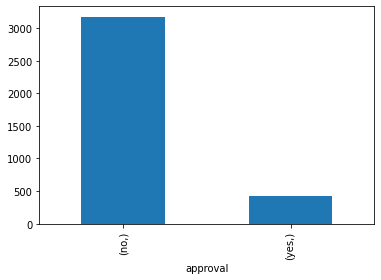

In [66]:
y_train.value_counts().plot.bar()

### Techniques for Handling Imbalanced Data 

###Random Oversampling

In [67]:
from imblearn.over_sampling import RandomOverSampler

o_smpl = RandomOverSampler(random_state = 42) 
X_o_smpl, y_o_smpl = o_smpl.fit_resample(X_train,y_train)




In [68]:
print ('Size Orginial', y_train.shape)
print ('Size after RandomOverSampler',y_o_smpl.shape)

Size Orginial (3600, 1)
Size after RandomOverSampler (6354, 1)


<Axes: xlabel='approval'>

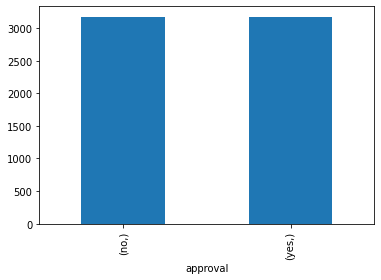

In [69]:
y_o_smpl.value_counts().plot.bar()

###Random Undersampling

In [70]:
from imblearn.under_sampling import RandomUnderSampler

u_smpl = RandomUnderSampler(random_state = 42) 

X_u_smpl, y_u_smpl = u_smpl.fit_resample(X_train,y_train)


In [71]:
print ('Size Orginial', y_train.shape)
print ('Size after RandomUnderSampler',y_u_smpl.shape)

Size Orginial (3600, 1)
Size after RandomUnderSampler (846, 1)


<Axes: xlabel='approval'>

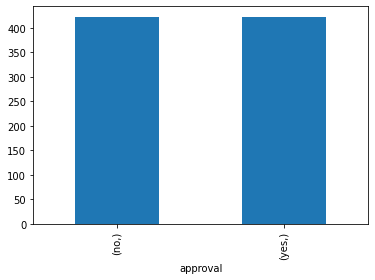

In [72]:
y_u_smpl.value_counts().plot.bar()

###Synthetic Minority Oversampling (SMOTE)

In [73]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state = 42) 

X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [77]:
print ('Size Orginial', y_train.shape)
print ('Size after SMOTE',y_smote.shape)

Size Orginial (3600, 1)
Size after SMOTE (6354, 1)


<Axes: xlabel='approval'>

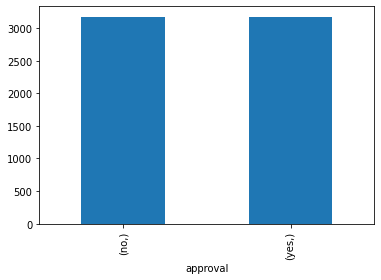

In [74]:
y_smote.value_counts().plot.bar()

###Borderline Smote

In [76]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state = 42) 

X_bsmote, y_bsmote = bsmote.fit_resample(X_train,y_train)

In [78]:
print ('Size Orginial', y_train.shape)
print ('Size after BorderlineSMOTE',y_bsmote.shape)

Size Orginial (3600, 1)
Size after BorderlineSMOTE (6354, 1)


<Axes: xlabel='approval'>

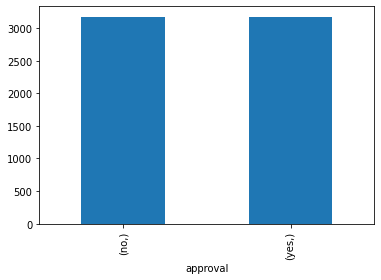

In [79]:
y_bsmote.value_counts().plot.bar()

###Adaptive Synthetic Oversampling (ADASYN)

In [80]:
from imblearn.over_sampling import ADASYN 

adasyn = ADASYN(random_state = 42) 

X_ada, y_ada = adasyn.fit_resample(X_train,y_train)

In [81]:
print ('Size Orginial', y_train.shape)
print ('Size after ADASYN',y_bsmote.shape)

Size Orginial (3600, 1)
Size after ADASYN (6354, 1)


<Axes: xlabel='approval'>

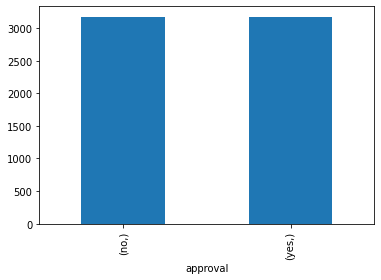

In [82]:
y_bsmote.value_counts().plot.bar()

###Comparison

Let's quickly compare our sampling techniques by looking at the results of after feeding them into a model.

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Original Data
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

#oversampling model 
clf_os = RandomForestClassifier(random_state=0)
clf_os.fit(X_o_smpl, y_o_smpl)
os_pred = clf_os.predict(X_test)

#undersampling model 
clf_us = RandomForestClassifier(random_state=0)
clf_us.fit(X_u_smpl, y_u_smpl)
us_pred = clf_us.predict(X_test)

#SMOTE 
clf_sm = RandomForestClassifier(random_state=0)
clf_sm.fit(X_smote, y_smote)
sm_pred = clf_sm.predict(X_test)

#borderline SMOTE 
clf_bsm = RandomForestClassifier(random_state=0)
clf_bsm.fit(X_bsmote, y_bsmote)
bsm_pred = clf_bsm.predict(X_test)

#ADDASYN
clf_ada = RandomForestClassifier(random_state=0)
clf_ada.fit(X_ada, y_ada)
ada_pred = clf_ada.predict(X_test)


<ipython-input-84-1a2acd8603e9>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-84-1a2acd8603e9>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_os.fit(X_o_smpl, y_o_smpl)
<ipython-input-84-1a2acd8603e9>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_us.fit(X_u_smpl, y_u_smpl)
<ipython-input-84-1a2acd8603e9>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_sm.fit(X_smote, y_smote)
<ipython-input-84-1a2acd8603e9>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [86]:
print('No Change Score: %.3f'% accuracy_score(y_test,pred))
print('Oversampling Score: %.3f' % accuracy_score(y_test,os_pred))
print('Undersampling Score: %.3f' % accuracy_score(y_test,us_pred))
print('SMOTE Score: %.3f '% accuracy_score(y_test,sm_pred))
print('Borderline SMOTE Score: %.3f'% accuracy_score(y_test,bsm_pred))
print('ADASYN Score: %.3f'% accuracy_score(y_test,ada_pred))

No Change Score: 0.896
Oversampling Score: 0.878
Undersampling Score: 0.744
SMOTE Score: 0.880 
Borderline SMOTE Score: 0.876
ADASYN Score: 0.876


##Output

In [87]:
pred = clf.predict(X_test)
pred

array(['no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no',

In [88]:
accuracy_score(y_test,pred)

0.8956714761376249

In [ ]:
my_submission = pd.DataFrame({ 'approval': pred})
# you could use any filename. We choose submission here
my_submission.to_csv('/kaggle/working/Output.csv', index=False)